# Deconstruct - Bubble stats 
- Number of traversals
- Number of paths
- Size of bubbles

In [33]:
# Import libs
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter


In [34]:
# Read the data function
def read_data(filename):
    data = []
    with open(filename) as file: 
        for line in file.readlines(): 
            if not line.startswith("#"): 
                ls = line.split()
                data.append([ls[0], ls[1], ls[2], ls[3:]])
    return data

In [35]:
# Read all data - takes some time to run 
d = [1,2,3,4,5]
data = []
for x in d: 
    print(x)
    data.extend(read_data("../results/deconstruct/stats/chr"+ str(x)+"_Chr"+str(x)+".stats"))

1
2
3
4
5


In [36]:
# Only take the SVs
# Definition of a SV is "having a allele which is bigger than 15 bp"
svs = []
for v in data: 
    lengths = [int(x) for x in v[2].split(",")]
    if max(lengths) >= 15: 
        svs.append(v)

In [37]:
# Just check an example
svs[:2]

[['>608>756',
  '>608>609>614>615>617>618>620>621>623>624>626>627>628>630>631>634>635>637>638>643>644>645>647>648>649>651>653>654>656>657>659>662>663>664>666>668>670>671>673>675>676>678>679>681>682>684>686>688>689>747>748>750>751>752>753>755>756,>608>609>614>615>616>618>620>621>622>624>625>627>628>630>631>634>635>637>638>643>644>645>647>648>649>651>653>654>656>658>659>661>663>664>666>668>670>671>673>675>676>678>679>681>682>683>684>685>686>688>689>690>692>693>694>697>700>703>704>705>706>709>713>714>716>717>719>720>722>723>725>726>727>729>730>731>732>734>736>737>738>739>741>742>744>745>746>747>748>750>751>752>753>755>756,>608>609>614>615>617>618>620>621>623>624>626>627>628>630>631>634>635>637>638>643>644>645>646>648>649>651>653>654>656>658>659>662>663>664>666>668>670>671>673>675>676>678>679>680>682>683>684>685>686>688>689>690>691>693>694>697>700>703>704>705>706>709>712>729>730>731>732>733>734>736>737>738>739>741>742>744>745>746>747>748>750>751>752>753>755>756,>608>609>613>615>617>618>620

In [38]:
svs

[['>608>756',
  '>608>609>614>615>617>618>620>621>623>624>626>627>628>630>631>634>635>637>638>643>644>645>647>648>649>651>653>654>656>657>659>662>663>664>666>668>670>671>673>675>676>678>679>681>682>684>686>688>689>747>748>750>751>752>753>755>756,>608>609>614>615>616>618>620>621>622>624>625>627>628>630>631>634>635>637>638>643>644>645>647>648>649>651>653>654>656>658>659>661>663>664>666>668>670>671>673>675>676>678>679>681>682>683>684>685>686>688>689>690>692>693>694>697>700>703>704>705>706>709>713>714>716>717>719>720>722>723>725>726>727>729>730>731>732>734>736>737>738>739>741>742>744>745>746>747>748>750>751>752>753>755>756,>608>609>614>615>617>618>620>621>623>624>626>627>628>630>631>634>635>637>638>643>644>645>646>648>649>651>653>654>656>658>659>662>663>664>666>668>670>671>673>675>676>678>679>680>682>683>684>685>686>688>689>690>691>693>694>697>700>703>704>705>706>709>712>729>730>731>732>733>734>736>737>738>739>741>742>744>745>746>747>748>750>751>752>753>755>756,>608>609>613>615>617>618>620

# Traversal

How many different traversals have been identified in each bubble. In reference terms, this number if the amount of alleles for each variation. 

In [49]:
# Traversal number
traversal_numb = []
for v in svs: 
    traversal_numb.append(len(v[2].split(",")))

In [50]:
import matplotlib
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False

In [ ]:
plt.figure(figsize = (8,5))
ax = plt.hist(traversal_numb, bins = np.linspace(0.5,28.5,29), log = True, edgecolor = "black", color = "orange")
plt.ylabel("Frequency")
plt.xlabel("Number of different traversals")
plt.savefig("plots/traversal.1000.png", dpi = 1000)
plt.savefigd = [1,2,3,4,5]

plt.savefig("plots/traversal.300.png", dpi = 300)
plt.savefig("plots/traversal.pdf")
plt.show()

In [ ]:
with open("tables_lists/traversal.txt", "w") as file:
    for item in traversal_numb:
        file.write(str(item) + "\n")  # 

# Size of bubbles

The size of the bubble is the amount of sequence between the two anchors. For example a SNP bubble has the total size of 2 (2x1bp), maximum size of 1 and minium size of 1. Ratio is also 1. 

In [ ]:

sizz = []
for v in svs: 
    sizz.append(max([int(x) for x in v[2].split(",")]))

In [ ]:
# It is log and only goes to the size of 15k
plt.figure(figsize = (8,5))
plt.hist(sizz, bins = np.linspace(0, 15000,151), log = True, edgecolor = "black", color = "orange")
plt.ylabel("Frequency")
plt.xlabel("Maximum size of the bubble")
plt.savefig("plots/maxsize.1000.png", dpi = 1000)
plt.savefig("plots/maxsize.300.png", dpi = 300)
plt.savefig("plots/maxsize.pdf")
plt.show()

In [45]:
with open("tables_lists/maxsize.bubble.txt", "w") as file:
    for item in sizz:
        file.write(str(item) + "\n")  # 

# Number of accessions in each bubble

Number of different genomes in each bubble. This does not reflect the possibility that a accession can pass the same bubble multiple times.

In [46]:

touched_paths = []
for v in svs: 
    touched_paths.append(len([x for x in v[3] if x != "."]))

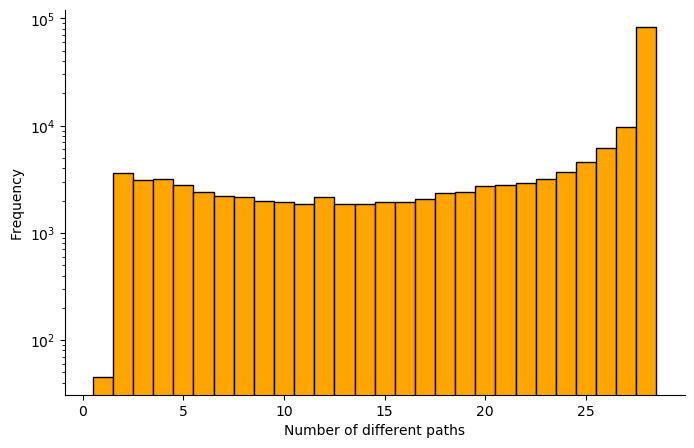

In [47]:
plt.figure(figsize = (8,5))
plt.hist(touched_paths, bins = np.linspace(0.5,28.5,29), log = True, edgecolor = "black", color = "orange")
plt.ylabel("Frequency")
plt.xlabel("Number of different paths")
plt.savefig("plots/accession.1000.png", dpi = 1000)
plt.savefig("plots/accession.300.png", dpi = 300)
plt.savefig("plots/accession.pdf")
plt.show()

In [48]:
with open("tables_lists/touched_paths.bubble.txt", "w") as file:
    for item in touched_paths:
        file.write(str(item) + "\n")  # 